# Harry Potter

In this notebook we'll do a simple analysis of the harry potter book based on word frequencies.  The purpose of this is to get you more comfotable manipulating text with python and creating simple plots with pandas.



# Read Text

Read in the text file Prisioner of Azkaban

In [22]:
with open("data/PrisonerOfAzkaban.txt","r") as f:
    text = f.read()
f.close()


# Counting 

1.) Given the text count:

* The number of sentences 
* The number of words
* The frequncies of every word


You can make some simplifying assumptions to make this easier. Don't worry about case or punctuation. We can assume that the number sentences is equal to the number of full stops.



In [25]:
import string
sentence_count = sum([1 for i in text if i=="."])

clean_string = False
if clean_string:
    chr_exclude = set(string.punctuation)
    clean_text = ''.join(ch for ch in text if ch not in chr_exclude)

book_raw = clean_text.split() if clean_string else text.split()
word_count = len(book_raw)
word_set = list(set(book_raw))
word_set.sort()
print("{} sentences, {} words, {} unique words.".format(sentence_count, word_count, len(word_set)))
word_count = {i: book_raw.count(i) for i in word_set}

9447 sentences, 106084 words, 15518 unique words.


Use your above calculations to get:

* The number of times the following characters are mentioned
    * Harry, Ron, Voldemort, Sirius , Vernon and Hermione
* The number of times the following words are mentioned
    * Azkaban, Hogwarts , Gryffindor , Hufflepuff , Ravenclaw amd  Slytherin

In [7]:
people = ['Harry','Ron','Voldemort','Sirius','Vernon','Hermione']
places = ['Azkaban','Hogwarts','Gryffindor','Hufflepuff','Ravenclaw','Slytherin']

In [14]:
ppl_count = {p: word_count[p] for p in people}
place_count = {p: word_count[p] for p in places}

print( ppl_count)
print( place_count)

{'Harry': 1819, 'Ron': 688, 'Voldemort': 35, 'Sirius': 131, 'Vernon': 63, 'Hermione': 603}
{'Azkaban': 47, 'Hogwarts': 87, 'Gryffindor': 108, 'Hufflepuff': 14, 'Ravenclaw': 30, 'Slytherin': 49}


simple assumption
{'Harry': 1256, 'Ron': 396, 'Voldemort': 23, 'Sirius': 82, 'Vernon': 34, 'Hermione': 402}
{'Azkaban': 26, 'Hogwarts': 48, 'Gryffindor': 91, 'Hufflepuff': 8, 'Ravenclaw': 22, 'Slytherin': 42}

With punctation removed
{'Harry': 1819, 'Ron': 688, 'Voldemort': 35, 'Sirius': 131, 'Vernon': 63, 'Hermione': 603}
{'Azkaban': 47, 'Hogwarts': 87, 'Gryffindor': 108, 'Hufflepuff': 14, 'Ravenclaw': 30, 'Slytherin': 49}

2.) Create a dataframe from your results, then make a bar plots to show the frequency of each name and place.

In [15]:
import pandas as pd
%matplotlib inline

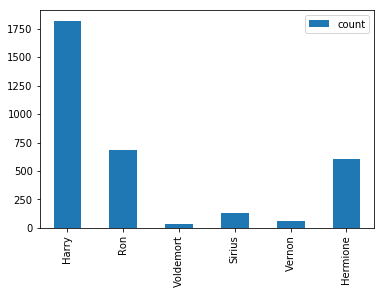

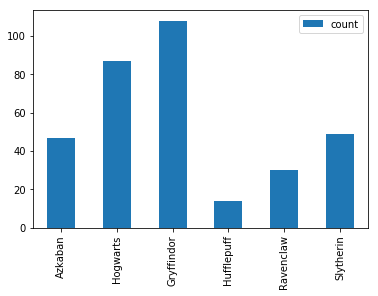

In [16]:
#df = pd.DataFrame(ppl_count.items(), columns = ppl_count.keys())
df_ppl = pd.DataFrame.from_dict(ppl_count, orient='index')
df_ppl.columns = ["count"]

df_place = pd.DataFrame.from_dict(place_count, orient='index')
df_place.columns = ["count"]

df_ppl.plot(kind='bar')
df_place.plot(kind='bar')


# Chapters

1.) Split the text into chapters.

```python
chapters = text.split("CHAPTER")
chapters = chapters[1:]

```

For each chapter count:

* The number of sentences 
* The number of words 
* How often each person is mentioned.

In [20]:
chapters = text.split("CHAPTER")
chapters = chapters[1:]
c_count = 0
for c in chapters:
    c_count += 1
    num_s = c.count(".")
    num_w = c.count(" ") + 1
    pp_count = {p: c.split().count(p) for p in people}
    print("Chapter{}: \n{} sentences, {} words, people mentioned:\n{}".format(c_count,num_s,num_w,pp_count))
    

Chapter1: 
0 sentences, 3376 words, people mentioned:
{'Harry': 70, 'Ron': 14, 'Voldemort': 2, 'Sirius': 0, 'Vernon': 12, 'Hermione': 7}
Chapter2: 
0 sentences, 3517 words, people mentioned:
{'Harry': 78, 'Ron': 2, 'Voldemort': 0, 'Sirius': 0, 'Vernon': 48, 'Hermione': 1}
Chapter3: 
0 sentences, 3974 words, people mentioned:
{'Harry': 99, 'Ron': 2, 'Voldemort': 1, 'Sirius': 5, 'Vernon': 0, 'Hermione': 2}
Chapter4: 
0 sentences, 4640 words, people mentioned:
{'Harry': 94, 'Ron': 41, 'Voldemort': 2, 'Sirius': 5, 'Vernon': 0, 'Hermione': 20}
Chapter5: 
0 sentences, 5066 words, people mentioned:
{'Harry': 102, 'Ron': 64, 'Voldemort': 0, 'Sirius': 2, 'Vernon': 0, 'Hermione': 49}
Chapter6: 
0 sentences, 5614 words, people mentioned:
{'Harry': 86, 'Ron': 42, 'Voldemort': 0, 'Sirius': 1, 'Vernon': 0, 'Hermione': 39}
Chapter7: 
0 sentences, 3844 words, people mentioned:
{'Harry': 36, 'Ron': 31, 'Voldemort': 2, 'Sirius': 1, 'Vernon': 0, 'Hermione': 19}
Chapter8: 
0 sentences, 4556 words, people 

2.) Create a dataframe where the first collum contains the chapter, and the other collums the place/character counts. 

In [58]:
data_list =[]
c_count = 0
for c in chapters:
    c_count += 1
    name_dict = {p: c.split().count(p) for p in people}
    place_dict = {p: c.split().count(p) for p in places}
    #data_list.append([c_count,pp_count,place_count])
    data_list.append({**name_dict,**place_dict})
data_df = pd.DataFrame(data_list)
#data_df.columns = ["chapter","places","characters"]

3.) Create a graph to visualize how what you calculated changes over the chapters.

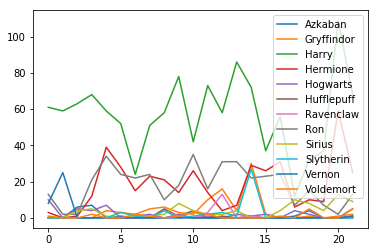

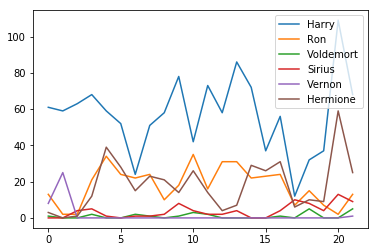

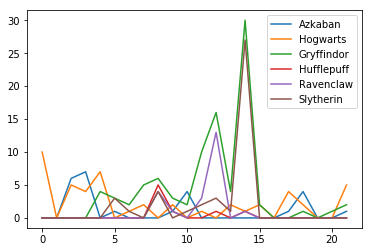

In [67]:
data_df.plot()
data_df[people].plot()
data_df[places].plot()

# Bonus

1.) How could the assumptions we made in perparing the text effect the outcome of our results?

2.) Modify the code to remove the simplifying assumptions we made at the start?
